# Analyzing Employee Exit Surveys

In this project, we're going to work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The survey data can be found here:
* [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
* [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

The data found at the links above are .csv files with CP1252 encoding. The Numbers software available on macOS devices was used to open the files and export them as UTF-8 encoded .csv files. This was done to make working with the data easier.

The main goals of this project are to find the answers to the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Initial Observations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# make all columns visible in dataframe
pd.set_option('display.max_columns', None)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dete_initial = pd.read_csv('dete_exit_survey_2014.csv')
tafe_initial = pd.read_csv('tafe_exit_survey_2013.csv')

In [3]:
dete_initial.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_initial.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. ††††Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induct

What we see from this first glance at the two datasets:
* The two datasets share many columns, but the respective columns have different names
* The "DETE Start Date" and "Role Start Date" columns have values called "Not Stated". It will be easier if we change the "Not Stated" values to NaN.
* The `tafe_initial` dataframe has values called "-", which are most likely meant to be NaN.
* There are a number of columns that we don't need in each dataset

## Making Corrections

First we'll read the datasets again, but this time including 
* `na_values='Not Stated'` in the DETE dataset reading
* `na_values='-'` in the TAFE dataset reading

In [5]:
dete_survey = pd.read_csv('dete_exit_survey_2014.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_exit_survey_2013.csv')

In [6]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. ††††Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induct

We can see that each of the datasets actually has a column that states whether the employee reported job dissatisfaction (`dete_survey.iloc[:, 13]` and `tafe_survey.iloc[:, 11]`). Recall that to answer our questions in the introduction, we only need to know whether the employee expressed job dissatisfaction or not. So, we can get rid of the columns that show the surveys' attempts at finding the reason for job dissatisfaction.

In [8]:
# updating the datasets according to our statements above
dete_survey.drop(columns = dete_survey.columns[28:49], inplace=True)
tafe_survey.drop(columns = tafe_survey.columns[17:66], inplace=True)

In [9]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. ††††What is your Gender?,CurrentAge. ††††Current Age,Employment Type. ††††Employment Type,Classification. ††††Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 ñ 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 ñ 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Renaming Columns

Since we'll eventually combine these datasets, we'll need to rename the columns to standardized column names. Since the DETE dataframe has cleaner column names, we'll choose those as our standard column names.

First, we'll need to clean the DETE column names.

In [11]:
dete_survey.columns = (dete_survey.columns
                                  .str.strip() # remove white spaces from the end of the string
                                  .str.replace(' ', '_') # replace white space with underscore
                                  .str.lower()) # convert string to all lowercase

Now, we'll compare the columns in each dataset to see which column names we can match.

In [12]:
dete_survey.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. ††††What is your Gender?,CurrentAge. ††††Current Age,Employment Type. ††††Employment Type,Classification. ††††Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 ñ 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# create a dictionary of the matching columns
matching = {'Record ID':'id',
            'CESSATION YEAR':'cease_date', 
            'Reason for ceasing employment':'separationtype',
            'Gender. ††††What is your Gender?':'gender',
            'CurrentAge. ††††Current Age':'age',
            'Employment Type. ††††Employment Type':'employment_status',
            'Classification. ††††Classification':'position',
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
            'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
tafe_survey.rename(columns=matching, inplace=True)

In [15]:
tafe_survey.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 ñ 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


Notice that the "Contributing Factor" columns were left untouched. We'll deal with those later.

## Filtering the Data

If we take a look at the `separationtype` column, there are different reasons for an employee leaving the position. Recall that our goal is concerned only with employees who resigned. So, we'll keep the rows that have "resign" in the `separationtype` column and remove the rest.

In [16]:
# check the different types of reasons for leaving the job
dete_survey['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

The TAFE `separationtype` column has a single unique resignation value:
* Resignation &mdash; 340 occurrences

Meanwhile, the DETE `separationtype` column has 3 different resignation values: 
* Resignation-Other reasons &mdash; 150 occurrences
* Resignation-Other employer &mdash; 91 occurrences
* Resignation-Move overseas/interstate &mdash; 70 occurrences

Again, we're only interested in resignations, no need for details. So, we can combine the three types of values into one by splitting the strings and calling the first index, which would be "Resignation". Bonus: it matches the TAFE data.

In [18]:
dete_survey['separationtype'] = (dete_survey['separationtype']
                                             .str.split('-')
                                             .str[0])

In [19]:
dete_survey['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [20]:
# create new dataframes containing only rows with Resignations
dete_resignations = dete_survey[dete_survey['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey[tafe_survey['separationtype']=='Resignation'].copy()

## Checking Start and End Dates of Employment

In [21]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [22]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [23]:
# remove the months in the values containing months
year = r'([2][0][0-2][0-9])'
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(year).astype(float)

In [24]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [25]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

<AxesSubplot:xlabel='dete_start_date'>

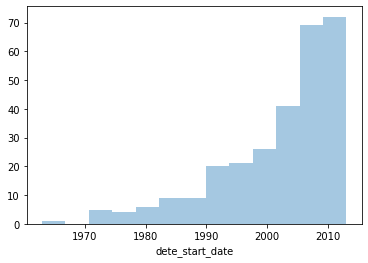

In [26]:
sns.distplot(dete_resignations['dete_start_date'], kde=None)

__Observations:__
* TAFE Institute experienced the most resignations in 2011 and 2012 &mdash; 116 and 94 resignations, respectively.
* DETE experienced the most resignations in 2012 and 2013 &mdash; 129 and 146 resignations, respectively.
* DETE experienced an increased hiring rate after the year 2000.
* The resignation years for the two datasets don't exactly match up, but there aren't any major issues with the data.

## Creating a New "Length of Service" Column in DETE dataframe

In the `tafe_resignations` dataframe, there is already a column, called `institute_service`, that states how long the employee has worked at the company (in years). The `dete_resignations` dataframe does not have this column, but we can make one using the `dete_start_date` and `cease_date` columns.

In [27]:
# create new column in dete_resignations describing the length of service in years
years_of_service = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'] = years_of_service

In [28]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Finding the length of service will help us answer our first question:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [29]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 ñ 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,634147506906311000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,634152007975694000,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,634153745310374000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 ñ 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Creating a "Dissatisfied" Column

Now, we'll go through the following columns to determine if an employee resigned due to any kind of job dissatisfaction:
* `tafe_resignations`:
    * `Contributing Factors. Dissatisfaction`
    * `Contributing Factors. Job Dissatisfaction`
* `dete_resignations`:
    * `job_dissatisfaction`
    * `dissatisfaction_with_the_department`
    * `physical_work_environment`
    * `lack_of_recognition`
    * `lack_of_job_security`
    * `work_location`
    * `employment_conditions`
    * `work_life_balance`
    * `workload`
    
We'll create a new column called `dissatisfied`, with rows that will contain one of the following values:
* `True`: if the employee resignation was due to dissatisfaction in any way
* `False`: if the employee resignation was due to any other reason
* `NaN`: if the columns stated above contain `NaN` values

In [30]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We'll convert the two columns above as such:
* `Contributing Factors. Dissatisfaction`:
    * `-` as `False`
    * `Contributing Factors. Dissatisfaction` as `True`
    * `NaN` as `NaN`
* `Contributing Factors. Job Dissatisfaction`:
    * `-` as `False`
    * `Job Dissatisfaction` as `True`
    * `NaN` as `NaN`

In [32]:
# function that converts dataframe elements from object to bool 
def update_values(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True

In [33]:
# update tafe_resignations dataframe: create new column with bool and NaN values
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
                                                        .applymap(update_values)
                                                        .any(axis=1, skipna=False))

In [34]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
# assign a copy of the tafe dataframe to "tafe_final"
tafe_final = tafe_resignations.copy()

In [36]:
# update dete_resignations dataframe: create new column with bool and NaN values
dissatisfied_categories = ['job_dissatisfaction',
                           'dissatisfaction_with_the_department',
                           'physical_work_environment',
                           'lack_of_recognition',
                           'lack_of_job_security',
                           'work_location',
                           'employment_conditions',
                           'work_life_balance',
                           'workload']
dete_resignations['dissatisfied'] = (dete_resignations[dissatisfied_categories]
                                                       .any(axis=1, skipna=False))

In [37]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [38]:
# assign a copy of the dete dataframe to "dete_final"
dete_final = dete_resignations.copy()

## Final Clean-Up Before Combining the Datasets

Our end goal is to aggregate the data according to the `institute_service` column. First, we'll add a column to each dataframe that will make them easily distinguishable.

In [39]:
dete_final['institute'] = 'DETE'
tafe_final['institute'] = 'TAFE'

In [40]:
dete_final.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE


In [41]:
tafe_final.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE


Now that we have the `dissatisfied` and `institute_service` columns, we can get rid of several columns that we won't need anymore in each dataframe. Since we know that we're dealing with only "Resignation" type surveys, we can remove `separationtype` from both dataframes as well.

In [42]:
# remove unnecessary columns from dete_final
dete_final.drop(columns = dete_final.columns[2:-9], inplace=True)

In [43]:
dete_final.head(2)

,id,separationtype,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE


In [44]:
dete_final.drop(columns = dete_final.columns[3:-3], inplace=True)

In [45]:
dete_final.head(2)

,id,separationtype,age,institute_service,dissatisfied,institute
3,4,Resignation,36-40,7.0,False,DETE
5,6,Resignation,41-45,18.0,True,DETE


In [46]:
dete_final.drop(columns = 'separationtype', inplace=True)

In [47]:
dete_final.head(2)

,id,age,institute_service,dissatisfied,institute
3,4,36-40,7.0,False,DETE
5,6,41-45,18.0,True,DETE


In [48]:
tafe_final.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 ñ 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [49]:
# remove unnecessary columns from tafe_final
tafe_final.drop(columns = tafe_final.columns[1:-7], inplace=True)

In [50]:
tafe_final.head(2)

,id,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,634139903350000000,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,634146578511788000,41 ñ 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [51]:
tafe_final.drop(columns = ['employment_status', 
                           'position', 
                           'role_service'], inplace=True)

In [52]:
tafe_final.head(2)

,id,age,institute_service,dissatisfied,institute
3,634139903350000000,NaN,NaN,False,TAFE
4,634146578511788000,41 ñ 45,3-4,False,TAFE


Now, both dataframes have identical column names.

In [53]:
# combine the datasets
combined = pd.concat([dete_final, tafe_final], ignore_index=True)

In [54]:
# check for null values
combined.isnull().sum().sort_values()

id                    0
institute             0
dissatisfied          8
age                  55
institute_service    88
dtype: int64

In [55]:
combined.head()

,id,age,institute_service,dissatisfied,institute
0,4,36-40,7,False,DETE
1,6,41-45,18,True,DETE
2,9,31-35,3,False,DETE
3,10,46-50,15,True,DETE
4,12,31-35,3,False,DETE


In [56]:
combined.tail()

,id,age,institute_service,dissatisfied,institute
646,635065973820625000,21 ñ 25,5-6,False,TAFE
647,635066785175197000,51-55,1-2,False,TAFE
648,635067716405666000,NaN,NaN,False,TAFE
649,635070442972541000,51-55,5-6,False,TAFE
650,635073030973791000,26 ñ 30,3-4,False,TAFE


The final resulting dataframe contains `dete_final` with `tafe_final` stacked below it.

## Cleaning up `age` and `institute_service` Columns

Above, we can see that the `age` column expresses age ranges by using either '-' or 'ñ'. We don't need the exact age to answer our questions, so we can just convert 'ñ' to '-', to make the column more uniform.

There are also some rows that are null in both `age` and `institute_service`. These rows don't provide any valuable information for us, so we'll remove them.

In [57]:
# remove rows that have NaN in BOTH 'age' & 'institute_service' columns
condition = (combined['age'].isnull()) & (combined['institute_service'].isnull())
drop_rows = combined[condition]
combined.drop(drop_rows.index, inplace=True)
combined.reset_index(inplace=True)

In [58]:
combined.tail()

,index,id,age,institute_service,dissatisfied,institute
593,644,635059949710781000,26 ñ 30,1-2,False,TAFE
594,646,635065973820625000,21 ñ 25,5-6,False,TAFE
595,647,635066785175197000,51-55,1-2,False,TAFE
596,649,635070442972541000,51-55,5-6,False,TAFE
597,650,635073030973791000,26 ñ 30,3-4,False,TAFE


In [59]:
# replace ' ñ ' with '-' in 'age' column
combined['age'] = combined['age'].str.replace(' ñ ', '-')

In [60]:
combined['age'].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56 or older      29
56-60            26
61 or older      23
20 or younger    10
NaN               2
Name: age, dtype: int64

In [61]:
# fill the 2 null values with the most common value, '41-45'
combined['age'].fillna('41-45', inplace=True)

In [62]:
combined['age'].value_counts(dropna=False)

41-45            95
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The `56 or older` category doesn't make sense because there are two more categories above it, `56-60` and `61 or older`. So, let's combine `56 or older` with `56-60`.

In [63]:
combined['age'] = combined['age'].str.replace('56 or older', '56-60')

In [64]:
combined['age'].value_counts(dropna=False)

41-45            95
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56-60            55
61 or older      23
20 or younger    10
Name: age, dtype: int64

Now let's clean up the `institute_service` column.

In [65]:
combined['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   35
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
10.0                   6
12.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


We can see that the years of service is displayed in several ways. To analyze the data, we'll convert the values into the following categories:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [66]:
# extract the years of service from 'institute_service'
combined['institute_service'] = (combined['institute_service']
                                          .astype('str')
                                          .str.extract(r'(\d+)')
                                          .astype(float))

In [67]:
combined['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [68]:
# create a function to map each value to one of our categories
def cat_services(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif year >= 3 and year <= 6:
        return 'Experienced'
    elif year >=7 and year <=10:
        return 'Established'
    elif year >= 11:
        return 'Veteran'

In [69]:
# apply cat_services to 'institute_service' column
combined['service_cat'] = combined['institute_service'].apply(cat_services)

In [70]:
combined.head()

,index,id,age,institute_service,dissatisfied,institute,service_cat
0,0,4,36-40,7.0,False,DETE,Established
1,1,6,41-45,18.0,True,DETE,Veteran
2,2,9,31-35,3.0,False,DETE,Experienced
3,3,10,46-50,15.0,True,DETE,Veteran
4,4,12,31-35,3.0,False,DETE,Experienced


In [71]:
# remove index column
combined.drop(columns='index', inplace=True)

## Initial Analysis

__Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?__

In [72]:
combined['dissatisfied'] = combined['dissatisfied'].astype(bool)

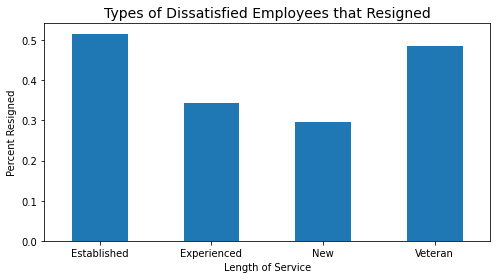

In [73]:
# calculate percentage of dissatisfied employees in each service_cat group
exp_resigned = combined.pivot_table(index='service_cat', values='dissatisfied')
exp_resigned.plot(kind='bar', figsize=(8,4), rot=0, legend=False)
plt.xlabel('Length of Service')
plt.ylabel('Percent Resigned')
plt.title('Types of Dissatisfied Employees that Resigned', fontsize=14)
plt.show()

From the plot above, we can see which employees resigned due to some sort of dissatisfaction with the job:
* $\approx$ 50% of Established employees (over 11 years of service)
* $\approx$ 50% of Veteran employees (7-10 years of service)
* $\approx$ 35% of Experienced employees (3-6 years of service)
* $\approx$ 30% of New employees (less than 3 years of service)

We can make the conclusion that employees with over 7 years of service are more likely to quit due to some kind of dissatisfaction.

__Are younger employees resigning due to some kind of dissatisfaction? What about older employees?__

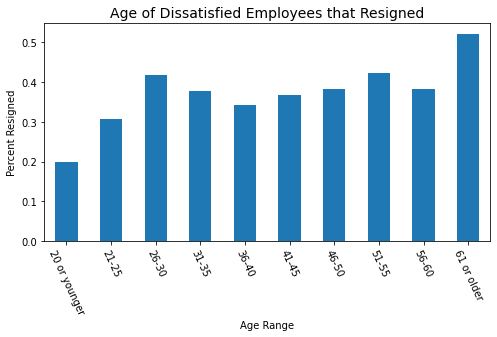

In [74]:
# calculate percentage of dissatisfied employees per age range
age_resigned = combined.pivot_table(index='age', values='dissatisfied')
age_resigned.plot(kind='bar', figsize=(8,4), rot=-65, legend=False)
plt.xlabel('Age Range')
plt.ylabel('Percent Resigned')
plt.title('Age of Dissatisfied Employees that Resigned', fontsize=14)
plt.show()

From the data above, we can conclude that:
* Employees aged 61 and older are the most likely to resign due to some kind of dissatisfaction. 
* Employees between ages 21 to 60 share similar chances of resigning, at an average of about 35% of employees within that age resigning due to some kind of dissatisfaction
* Employees aged 20 or younger are the least likely to resign due to dissatisfaction